        This is a notebook created by MZ while studying the book Data Science from Scrach by Joel Grus.

1.Introduction

In [1]:
#This is a hyposis scenario for warmup purpose.

users = [
    #this is a list of dicts
    { "id": 0, "name": "Hero" }, 
    { "id": 1, "name": "Dunn" }, 
    { "id": 2, "name": "Sue" }, 
    { "id": 3, "name": "Chi" }, 
    { "id": 4, "name": "Thor" }, 
    { "id": 5, "name": "Clive" }, 
    { "id": 6, "name": "Hicks" }, 
    { "id": 7, "name": "Devin" }, 
    { "id": 8, "name": "Kate" }, 
    { "id": 9, "name": "Klein" } 
]
print (users)

#print out all the id # in every dict within the list 'users'.
for i in users:
    print (i["id"])

[{'id': 0, 'name': 'Hero'}, {'id': 1, 'name': 'Dunn'}, {'id': 2, 'name': 'Sue'}, {'id': 3, 'name': 'Chi'}, {'id': 4, 'name': 'Thor'}, {'id': 5, 'name': 'Clive'}, {'id': 6, 'name': 'Hicks'}, {'id': 7, 'name': 'Devin'}, {'id': 8, 'name': 'Kate'}, {'id': 9, 'name': 'Klein'}]
0
1
2
3
4
5
6
7
8
9


5


In [2]:
friendships = [
    #This is a list of tuples with the IDs of users in above code
    #each tuple pair indicates the friendship relatiionship between two users, 
    #for instance, in tuple (0,1) user with ID 0 and user with ID 1 are friends. 
    ( 0 , 1 ), ( 0 , 2 ), ( 1 , 2 ), ( 1 , 3 ), ( 2 , 3 ), ( 3 , 4 ), 
    ( 4 , 5 ), ( 5 , 6 ), ( 5 , 7 ), ( 6 , 8 ), ( 7 , 8 ), ( 8 , 9 )
]
print (friendships)

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


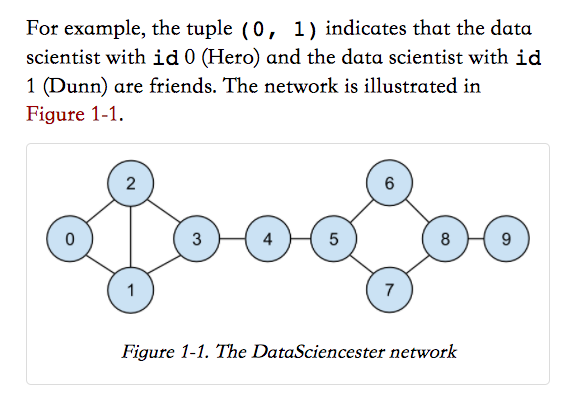

In [3]:
#set each users' friend property in an empty list
for user in users : 
    user [ "friends" ] = []
    print (user)

{'id': 0, 'name': 'Hero', 'friends': []}
{'id': 1, 'name': 'Dunn', 'friends': []}
{'id': 2, 'name': 'Sue', 'friends': []}
{'id': 3, 'name': 'Chi', 'friends': []}
{'id': 4, 'name': 'Thor', 'friends': []}
{'id': 5, 'name': 'Clive', 'friends': []}
{'id': 6, 'name': 'Hicks', 'friends': []}
{'id': 7, 'name': 'Devin', 'friends': []}
{'id': 8, 'name': 'Kate', 'friends': []}
{'id': 9, 'name': 'Klein', 'friends': []}


In [4]:
# NOT QUITE UNDERSTAND THE OUTCOME !!!
################################################

for i , j in friendships : 
    # this works because users[i] is the user whose id is i 
    
    # add j as a friend of i 
    users [ i ]["friends"] . append ( users [ j ]) 
    # add i as a friend of j
    users [ j ][ "friends" ] . append ( users [ i ]) 
    print (i,j) #print out all the friends pairs. They are the same as the inputs given to friendships above

0 1
0 2
1 2
1 3
2 3
3 4
4 5
5 6
5 7
6 8
7 8
8 9


In [5]:
def number_of_friends ( user ): 
    """how many friends does _user_ have?""" 
    # length of friend_ids list
    return len ( user [ "friends" ]) 
total_connections = sum ( number_of_friends ( user ) for user in users ) # 24
print (total_connections) # print out the total number of connections

24


In [6]:
from __future__ import division # integer division is lame 
num_users = len ( users ) # length of the users list 
avg_connections = total_connections / num_users # 2.4

print (num_users, avg_connections)

10 2.4


In [7]:
# create a list (user_id, number_of_friends) 
num_friends_by_id = [(user['id'],number_of_friends(user)) for user in users]
print (num_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [8]:
"""The coding below is called metric degree centrality!!!"""

# create a list (user_id, number_of_friends) 
num_friends_by_id = [(user['id'],number_of_friends(user)) for user in users]
print (num_friends_by_id)

sorted ( num_friends_by_id , 
        # get it sorted by num_friends, largest to smallest  
        #key = lambda(user_id , num_friends): num_friends , # valid in Python 2, invalid in Python 3
        key=lambda num_friends:num_friends[0],
        reverse = True 
       ) 
 
# each pair is (user_id, num_friends) 
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), 
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

#print(num_friends_by_id)



[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


[(9, 1),
 (8, 3),
 (7, 2),
 (6, 2),
 (5, 3),
 (4, 2),
 (3, 3),
 (2, 3),
 (1, 3),
 (0, 2)]

In [9]:

def friends_of_friend_ids_bad(user):
    return [
        foaf['id'] # "foaf" is short for "friend of a friend" 
        for friend in user['friends'] # for each of user's friends 
        for foaf in friend['friends'] # get each of their friend
        
    ]
friends_of_friend_ids_bad(users[0]) # the outcome repetites itself more than expected, this problem casued when
# assigning i,j in friendships into 'friends'

[0, 2, 3, 0, 1, 3]

In [14]:
#for i in user:
print(user)

{'id': 9, 'name': 'Klein', 'friends': [{'id': 8, 'name': 'Kate', 'friends': [{'id': 6, 'name': 'Hicks', 'friends': [{'id': 5, 'name': 'Clive', 'friends': [{'id': 4, 'name': 'Thor', 'friends': [{'id': 3, 'name': 'Chi', 'friends': [{'id': 1, 'name': 'Dunn', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [{...}, {'id': 2, 'name': 'Sue', 'friends': [{...}, {...}, {...}]}]}, {'id': 2, 'name': 'Sue', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [{...}, {...}]}, {...}, {...}]}, {...}]}, {'id': 2, 'name': 'Sue', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [{'id': 1, 'name': 'Dunn', 'friends': [{...}, {...}, {...}]}, {...}]}, {'id': 1, 'name': 'Dunn', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [{...}, {...}]}, {...}, {...}]}, {...}]}, {...}]}, {...}]}, {...}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]}]}, {...}]}, {'id': 7, 'name': 'Devin', 'friends': [{'id': 5, 'name': 'Clive', 'friends': [{'id': 4, 'name': 'Thor', 'friends': [{'id': 3, 'name': 'Chi', 'friends': [{'i

In [18]:
for u in users:
    print(u['id'])

0
1
2
3
4
5
6
7
8
9


In [19]:
for u in users:
    print(u['name'])

Hero
Dunn
Sue
Chi
Thor
Clive
Hicks
Devin
Kate
Klein


In [17]:
for u in users:
    print(u['friends'])

[{'id': 1, 'name': 'Dunn', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [...]}, {'id': 2, 'name': 'Sue', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [...]}, {...}, {'id': 3, 'name': 'Chi', 'friends': [{...}, {...}, {'id': 4, 'name': 'Thor', 'friends': [{...}, {'id': 5, 'name': 'Clive', 'friends': [{...}, {'id': 6, 'name': 'Hicks', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{...}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]}, {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{'id': 6, 'name': 'Hicks', 'friends': [{...}, {...}]}, {...}, {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]}]}]}]}]}, {'id': 3, 'name': 'Chi', 'friends': [{...}, {'id': 2, 'name': 'Sue', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [...]}, {...}, {...}]}, {'id': 4, 'name': 'Thor', 'friends': [{...}, {'id': 5, 'name': 'Clive', 'friends': [{...}, {'id': 6, 'name': 'Hicks', 'friends': [{...}, {'

In [27]:
#MUTUAL FRIENDS
#Make sure that users with different ids are not the same user.

from collections import Counter
def not_the_same(user,other_user):
    return user['id']!=other_user['id']

print(not_the_same(users[1],users[1])) #if assigning same id to user and other_user, the output will return 'false'
print(not_the_same(users[1],users[2])) #if the other way around, the output will return 'true'

False
True


In [42]:
'''how to use all()'''

# all values true
l = [1, 3, 4, 5]
print(all(l))

# all values false
l = [0, False]
print(all(l))

# one false value
'''Not so sure why 0 is a false value. Because number form cannot be zero which means no value at all?'''
l = [1, 3, 4, 0]
print(all(l))

# one true value
l = [0,False,5]
print(all(l))

# empty iterable
l = []
print(all(l))

True
False
False
False
True


In [45]:
"""how to use defaultdict"""
from collections import defaultdict

s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)] #a dict of tuples
d = defaultdict(list)
for k, v in s:
     d[k].append(v)

#sorted(d.items())
print(d)

#When sorted, the result should be: [('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]



defaultdict(<class 'list'>, {'yellow': [1, 3], 'blue': [2, 4], 'red': [1]})


In [47]:
'''how to list the words and the times it appears'''

#words_and_counts is not defined here, this is just a presentation of how it may look like

for word,count in words_and_counts.most_common():
    if count>1:
        print(word,count)

NameError: name 'words_and_counts' is not defined

In [48]:
'''how to use most_common()'''

# Find the ten most common words in Hamlet
import re
words = re.findall(r'\w+', open('hamlet.txt').read().lower())
Counter(words).most_common(10)

#the result will be:  [('the', 1143), ('and', 966), ('to', 762), ('of', 669), ('i', 631),
# ('you', 554),  ('a', 546), ('my', 514), ('hamlet', 471), ('in', 451)]



'how to use most_common()'

In [49]:
'''you can use \ to write a continued code in a new line'''

s = 2+\
3
print(s)

5


In [ ]:
'''how to use the magic %paste'''

#You can't copy to IPython directly. This are the steps:

#1. Copy the lines you want to copy into IPython into the clipboard
#2. Enter %paste into IPython
#3. Press enter
#4. Profit!

In [50]:
#python3 includes normal division with float results by default.

5/2

2.5

In [52]:
'''ignore a value while extract another value specifically'''

_,y =[1,2]

print(y)

2


In [67]:
'''how to use get()'''

y = {'man':80,'woman':90}
s = y.get('man',0)
t = y.get('girl',0) # if a key is not in the dict, get() will return a specified default value, such as 0 in this case
z = y.get('woman',0)

print(s,t,z)

80 0 90


In [68]:
tw = {'user':'mark','age':29}
tw.items() # return with the key-value pair in dict


dict_items([('user', 'mark'), ('age', 29)])

In [69]:
any([]) #no element in empty list []

# return True when any of the items is true

False

In [71]:
'''how to use sort'''

x=[4,1,2,3]
y=sorted(x)
x.sort()
print(y,x)

[1, 2, 3, 4] [1, 2, 3, 4]


In [76]:
'''how to use generator for delay purpose'''

def lazy_range(n):
    while i<n:
        yield i
        i += 1

lazy_evens_below_20=(i for i in lazy_range(20) if i%2 ==0)
print(lazy_evens_below_20)


<generator object <genexpr> at 0x1049f1bf8>


In [80]:
'''how to use zip'''

list1 = ['a','b','c']
list2 = [1,2,3]
z=zip(list1,list2)
for i in z:
    print(i)

('a', 1)
('b', 2)
('c', 3)


In [82]:
'''how to unzip'''

pair = [('a',1),('b',2)]

qwe,ert = zip(*pair)
print(qwe,ert)



('a', 'b') (1, 2)


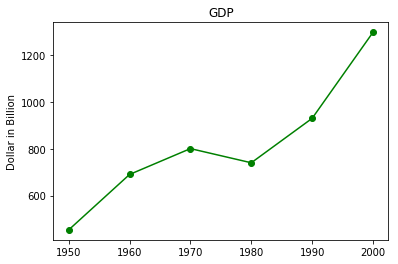

In [2]:
'''how to use matplotlib to draw a simple linear chart'''


from matplotlib import pyplot as plt

years =[1950,1960,1970,1980,1990,2000]
gdp=[453,690,800.56,740,930,1298]

plt.plot(years,gdp,color='green',marker='o') # marker presents the dots on the line
# the default color of line is red

plt.title('GDP')
plt.ylabel('Dollar in Billion')
plt.show()


In [7]:
'''how to use enumerate()'''


my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list, 1):
    print(c, value)

# Output:
# 1 apple
# 2 banana
# 3 grapes
# 4 pear


my_list1 = ['apple', 'banana', 'grapes', 'pear']
counter_list = list(enumerate(my_list1, 1))
print(counter_list)
# Output: [(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]

1 apple
2 banana
3 grapes
4 pear
[(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]


In [ ]:
'''how to use xtick()'''

# It serves the purpose of getting or setting the current tick locations and labels of the x-axis.

#locs, labels = xticks()           # Get locations and labels

#xticks(locs, [labels], **kwargs)  # Set locations and labels

In [9]:
'''how to use plt.axis()'''

#plt.axis(2013,2014,0,550) 
#first two numbers specify the range of x-aixs, from 2013 to 2014; 
#the 3rd and 4th numbers is here for y-aixs, from 0 to 550.

'how to use plt.axis()'

In [14]:
'''how to do calculations with lists of vectors'''
v=[1,2,3,4,5]
w=[98,49,30,90,62]
def vector_add(v,w):
    return[vi+wi for vi, wi in zip(v,w)]
vector_add(v,w) #the arguments of zip() should be iterable, therefore you can call some action such as vector_add(1,2)
#since 1,2 are not iterable items.

[99, 51, 33, 94, 67]

In [3]:
'''python code to demonstrate working of reduce()'''
 
# importing functools for reduce()
import functools
 
# initializing list
lis = [ 1 , 3, 5, 6, 2,]
 
# using reduce to compute sum of list
print ("The sum of the list elements is : ",end="")
print (functools.reduce(lambda a,b : a+b,lis))
 
# using reduce to compute maximum element from list
print ("The maximum element of the list is : ",end="")
print (functools.reduce(lambda a,b : a if a > b else b,lis))

The sum of the list elements is : 17
The maximum element of the list is : 6


In [16]:
'''what does end= means in python print() function'''

#The default value of end is \n meaning that after the print statement it will print a new line. So simply stated end is what you want to be printed after the print statement has been executed

#Eg:
print ("hello",end=" +") 
#will print hello +

hello +

In [21]:
'''dot product, the sum result of elements multipication''' 

def dot(v,w):
    return sum(vi*wi for vi,wi in zip(v,w))
dot(v,w)

956

In [ ]:
'''MATRIX: a list of list'''

A = [[1,2,3],[4,5,6]] #2 rows and 3 columns, begins with 0 row / 0 colummn.

In [18]:
'''Probability - when a number in wer is between 0 and 1(both edges included), then P(wer) = 1, otherwise P(wer)=0'''


wer =[1.5,0.5,1,-1.4,0.62347,0.998,-0.12]
wer_sorted=sorted(wer)


'''uniform distribution'''
# pdf = probability density function

#def uniform_pdf():
#    for i in wer:
#        if i>=0 and i<=1:
#            ert.append(1)
#        else: ert.append(0)
#    print(ert)

ert=list()
for i in wer_sorted:
    if i>=0 and i<=1:
        ert.append(1)
    else: ert.append(0)

print(wer_sorted)
print(ert)    
            



from matplotlib import pyplot as plt

plt.plot(wer_sorted,ert,color='green',marker='o') # marker presents the dots on the line
#plt.axis(-2,2,-2,2)

plt.title('uniform_pdf')
plt.ylabel('Probability')
plt.xlabel('Random number')
plt.show()





[-1.4, -0.12, 0.5, 0.62347, 0.998, 1, 1.5]
[0, 0, 1, 1, 1, 1, 0]


<Figure size 640x480 with 1 Axes>

In [15]:
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0


'''cdf: cumulative distribution function'''

'cdf: cumulative distribution function'

The cumulative distribution function of a real-valued random variable X is the function given by

F X(x)=P(X<=x)

In [20]:
'''Normal Distribution'''

def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi=math.sqrt(2*math.pi)
    return math.exp(-(x-mu)**2/(2*sigma**2)/(sqrt_two_pi*sigma))

f(x,y)={\begin{cases}x&{\text{if }}y\neq x^{2}\\0&{\text{if }}y=x^{2}\end{cases} }

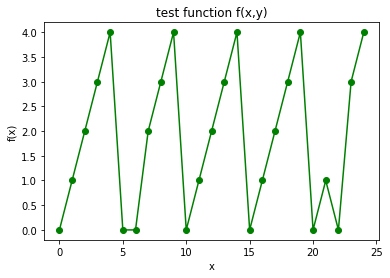

In [19]:
'''trying to demonstrate the outcome of above function, seems wrong'''

def f(x,y):
    if y !=x**2:
        return x
    else:
        return 0



from matplotlib import pyplot as plt

plt.plot([x_i for x_i in range(25)],[f(x_i,y_j) for y_j in range(5) for x_i in range(5)],color='green',marker='o')

plt.title('test function f(x,y)')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()



In [23]:
'''sys.argv is a list in Python, which contains the command-line arguments passed to the script. 

With the len(sys.argv) function you can count the number of arguments. 

If you are gonna work with command line arguments, you probably want to 
use sys.argv. 

To use sys.argv, you will first have to import the sys module. '''


import sys, re

print(sys.argv[0])
print(len(sys.argv))
print(str(sys.argv))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py
3
['/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py', '-f', '/Users/xiucat/Library/Jupyter/runtime/kernel-8eeefff5-8dd1-4722-84ec-8bb916268953.json']


In [ ]:
'''sys.stdin & sys.stdout see page 95'''

In [ ]:
'''USE with to open file so that you dont need to close it'''

with open(filename,'r') as f:
    data = function(f)

In [ ]:
'''how to use csv module'''

'''imagine there is a txt file:
6/20/2014 aapl 90.01
6/20/2014 msft  41.68
6/20/2014 fb     64.5
'''

import csv
with open('x.txt','rb') as f:
    reader = csv.reader(f,delimiter ='\t')
    for row in reader:
        date = row[0]
        symbol=row[1]
        closing_price=float(row[2])
        process(date,symbol,closing_price)

In [26]:
'''beautifulsoup example'''


html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
# 'html.parser' is a feature used as a tree builder

print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [29]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""



from bs4 import BeautifulSoup
import requests
html = requests.get(html_doc).text
soup = BeautifulSoup(html,'html5lib')

InvalidSchema: No connection adapters were found for '<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
'

In [31]:
#A Tag object corresponds to an XML or HTML tag in the original document:

soup = BeautifulSoup('<b class="boldest">Extremely bold</b>','html5lib')
# 'html5lib' should be included or the code will cause a warning 
tag = soup.b
type(tag)
# <class 'bs4.element.Tag'>

bs4.element.Tag

In [33]:
from bs4 import BeautifulSoup
import requests

url = 'http://duleme.cn/?p=5297'
soup = BeautifulSoup(requests.get(url).text,'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html lang="zh-CN">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   注意了！神要出来了 | 读了么
  </title>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="http://duleme.cn/zda213/xmlrpc.php" rel="pingback"/>
  <script>
   /* You can add more configuration options to webfontloader by previously defining the WebFontConfig with your options */
                            if ( typeof WebFontConfig === "undefined" ) {
                                WebFontConfig = new Object();
                            }
                            WebFontConfig['google'] = {families: ['Roboto:100,300,400,500,700,900,100italic,300italic,400italic,500italic,700italic,900italic', 'Roboto+Slab:100,300,400,700']};

                            (function() {
                                var wf = document.createElement( 'script' );
                                wf.src = 'https://ajax.googleapis.com/ajax/libs/web

In [9]:
'''twitter api'''

'''my testing app, consumer key & secret'''

#Consumer Key (API Key)
#s0Gk0JU6GmXb9L7FeXiSK7HSi

#Consumer Secret (API Secret)
#pChKT2eOhwkx9FMEnVE3yCErAkGeoBJZxtFoWf7PYU6T0mde3m

#Access Token
#245746970-DUNMx2hg67JawY7jN5rMX8CNKesbdbkthRI7d3hg

#Access Token Secret
#Jx9NoL5oBYlonKMo80jCkZUDZSuCHJ9LjHOHQ7KBvHwpJ


In [14]:
'''use a Twitter API for tweets'''


from twython import Twython

twitter = Twython('s0Gk0JU6GmXb9L7FeXiSK7HSi','pChKT2eOhwkx9FMEnVE3yCErAkGeoBJZxtFoWf7PYU6T0mde3m')
#above are my consumer key and secret
for status in twitter.search(q='"data science"')["statuses"]:
    user = status['user']['screen_name'].encode('utf-8')
    text = status['text'].encode('utf-8')
    print(user,':',text)
    print

b'K05AE' : b'#RT @Strat_AI: RT @Strat_AI:\n10 Free Must-Read Books for #MachineLearning and #DataScience via @Ronal_vanLoon\xe2\x80\xa6 https://t.co/qjoyS2LJLi'
b'seowaresolution' : b'I recently came across a wonderful post by Talia Borodin titled "Think Your Company Needs a Data Scientist? You\'re\xe2\x80\xa6 https://t.co/srsEzNyceG'
b'daph2345' : b'RT @profcarroll: Mercer, Bannon, Nix knew that the data science talent had to be American. They didn\xe2\x80\x99t have it so they cheated and allegedl\xe2\x80\xa6'
b'AI_Marketers' : b'#RT @Strat_AI: RT @Strat_AI:\n10 Free Must-Read Books for #MachineLearning and #DataScience via @Ronal_vanLoon\xe2\x80\xa6 https://t.co/8Ql3zPEMc9'
b'bobehayes' : b"4 things executives should know about #AI and #datascience https://t.co/F3yJxQLsvb\n\n1. You have data but aren't usi\xe2\x80\xa6 https://t.co/fsPzADssIM"
b'odscai' : b'AI and data science are at the heart of some of the world\xe2\x80\x99s most dynamic and exciting startups. No industry is immu\xe

In [ ]:
'''use TwythonStreamer collecting enough tweets for analysis, Page 109''' 

In [ ]:
'''math.floor()'''

#The Math.floor() function returns the largest integer 
#less than or equal to a given number.



In [24]:
import math

def normal_cdf ( x , mu = 0 , sigma = 1 ): 
    return ( 1 + math . erf (( x - mu ) / math . sqrt ( 2 ) / sigma )) / 2

normal_cdf(1)

0.841344746068543

In [27]:
'''-100 to 100 , randomly select 10000 numbers'''

# function random() generates a random float uniformly 
# in the semi-open range [0.0, 1.0). 

import random

random.seed(0)

uniform =[200*random.random() - 100 for _ in range(10000)]
print(uniform)

'''so if random.random() = x, then it is 200*x-100. 
When x =0,0.5,1; 200x-100 = -100,0,100
This is the range we want.'''

[68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235, 81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653, -37.970486136133474, 45.96634965202574, 79.7676575935987, 36.79678638308826, -5.571456909457325, -79.85975838632683, -13.165632909243257, 22.177394688760316, 82.60221064757965, 93.32127355415176, -4.5980446894566, 73.061985554328, -47.90153792160812, 61.005565402604475, 9.739860767117861, -97.19165996719622, 43.94093728079082, -20.235291555146247, 64.96899542964661, 33.63064024637018, -99.77143613711435, -1.284426706935065, 73.52055509855617, -51.2178246225736, -34.95912745052199, 74.09424642173093, -61.78658169952189, 13.50214812413438, -52.27681427695596, 93.50805005802866, 60.63589385597402, -10.4

In [28]:
'''inverse normal cdf'''


def inverse_normal_cdf ( p , mu = 0 , sigma = 1 , tolerance = 0.00001 ): 
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale 
    if mu != 0 or sigma != 1 : 
        return mu + sigma * inverse_normal_cdf ( p , tolerance = tolerance ) 
    low_z = - 10.0 # normal_cdf(-10) is (very close to) 0 
    hi_z = 10.0 # normal_cdf(10) is (very close to) 1 
    while hi_z - low_z > tolerance : 
        mid_z = ( low_z + hi_z ) / 2 # consider the midpoint 
        mid_p = normal_cdf ( mid_z ) # and the cdf's value there 
        if mid_p < p : # midpoint is still too low, search above it 
            low_z = mid_z 
        elif mid_p > p : # midpoint is still too high, search below it 
            hi_z = mid_z
        else : break 
    return mid_z

In [ ]:
'''map() function returns a list of the results after applying the given function 
to each item of a given iterable (list, tuple etc.)'''



# Python program to demonstrate working of map.
 
# Return double of n
def addition(n):
    return n + n
 
# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(list(result))

In [13]:
'''define distance(x,y)'''

import math

def distance(x, y):
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

ab = distance([123,456],[34,908])
print(ab)



'''THIS IS NOT THE MODULE "DISTANCE" '''


460.6788469204984


In [ ]:
'''
python - What does .shape[] do in "for i in range(Y.shape[0])"? 

If Y has n rows and m columns, then Y.shape is (n,m) . 
So Y.shape[0] is n . 
Shape is a tuple that gives dimensions of the array.. 
Shape is a tuple that gives you an indication of the number of dimensions in the array.

'''

In [1]:

'''zip(list) and zip(*list)'''

'''zip wants a bunch of arguments to zip together, but what you have is a single argument
(a list, whose elements are also lists). The * in a function call "unpacks" a list (or other iterable), 
making each of its elements a separate argument. 

So without the *, you're doing zip( [[1,2,3],[4,5,6]] ). With the *, you're doing zip([1,2,3], [4,5,6]).'''



'zip wants a bunch of arguments to zip together, but what you have is a single argument\n(a list, whose elements are also lists). The * in a function call "unpacks" a list (or other iterable), \nmaking each of its elements a separate argument. \n\nSo without the *, you\'re doing zip( [[1,2,3],[4,5,6]] ). With the *, you\'re doing zip([1,2,3], [4,5,6]).'

In [1]:
#Return a list of the n most common elements and their counts from the most common to the least. 
#If n is omitted or None, most_common() returns all elements in the counter. 
#Elements with equal counts are ordered arbitrarily:

import collections

abc = 'abracadabra'
cdf = collections.Counter(abc).most_common(3) # most common 3 letters
print(cdf)

#[('a', 5), ('r', 2), ('b', 2)]

[('a', 5), ('b', 2), ('r', 2)]


In [ ]:
#square root(-1) = i

#https://docs.scipy.org/doc/numpy-1.9.2/reference/generated/numpy.dot.html

'''numpy.dot'''

'''
numpy.dot(a, b, out=None)
Dot product of two arrays. Specifically,

If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:

dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
Parameters:	
a : array_like

First argument.

b : array_like

Second argument.

out : ndarray, optional

Output argument. This must have the exact kind that would be returned if it was not used. In particular, it must have the right type, must be C-contiguous, and its dtype must be the dtype that would be returned for dot(a,b). This is a performance feature. Therefore, if these conditions are not met, an exception is raised, instead of attempting to be flexible.

Returns:	
output : ndarray

Returns the dot product of a and b. If a and b are both scalars or both 1-D arrays then a scalar is returned; otherwise an array is returned. If out is given, then it is returned.

Raises:	
ValueError

If the last dimension of a is not the same size as the second-to-last dimension of b.

See also
vdot
Complex-conjugating dot product.
tensordot
Sum products over arbitrary axes.
einsum
Einstein summation convention.
matmul
‘@’ operator as method with out parameter.
'''
#Examples

np.dot(3, 4)
#12

#Neither argument is complex-conjugated:

np.dot([2j, 3j], [2j, 3j]) #since j = √-1 (dont ask me why), then the dot equals to -13 with zero j. 
#(-13+0j) 


#For 2-D arrays it is the matrix product:

>>> a = [[1, 0], [0, 1]]
>>> b = [[4, 1], [2, 2]]
>>> np.dot(a, b)
array([[4, 1],
       [2, 2]])



'''STOPS HERE???'''


>>> a = np.arange(3*4*5*6).reshape((3,4,5,6))
>>> b = np.arange(3*4*5*6)[::-1].reshape((5,4,6,3))
>>> np.dot(a, b)[2,3,2,1,2,2]
499128
>>> sum(a[2,3,2,:] * b[1,2,:,2])
499128


In [ ]:
'''video about conjugating of complex numbers'''

#https://www.khanacademy.org/math/precalculus/imaginary-and-complex-numbers/complex-conjugates-and-dividing-complex-numbers/v/complex-conjugates

In [2]:
'''another example of numpy dot()'''


# Python Program illustrating
# numpy.dot() method
 
import numpy as geek
 
# Scalars
product = geek.dot(5, 4)
print("Dot Product of scalar values  : ", product)
 
# 1D array
vector_a = 2 + 3j
vector_b = 4 + 5j
 
product = geek.dot(vector_a, vector_b)
print("Dot Product  : ", product)

'''explanation of 1D array expample:
dot(vector_a, vector_b) == (2+3j)(4+5j) == 8 + 22j + 15(-1) == -7 + 22j

The imagenary part of the complex number, no matter what symbol being used (i,j, etc.), equals to √-1.

'''


#Output –

#Dot Product of scalar values  :  20
#Dot Product  :  (-7+22j)

Dot Product of scalar values  :  20
Dot Product  :  (-7+22j)


In [ ]:
'''collections deque, a queue: list-like container with fast appends and pops on either end'''

